<a href="https://colab.research.google.com/github/CrazyAsura/Data-Science/blob/main/Currency_Rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📊 ETL Report – Currency Exchange Rates API


---


1. Introduction

This project demonstrates a simple ETL (Extract, Transform, Load) pipeline using Python with:

requests → API data extraction

pandas and numpy → data cleaning and transformation

matplotlib and seaborn → data visualization

Jupyter Notebook → interactive analysis

The data comes from the ExchangeRate API, providing daily exchange rates relative to the USD (US Dollar).



---


2. ETL Pipeline
🔹 Extract

We fetched real-time exchange rates from:

https://api.exchangerate-api.com/v4/latest/USD


The API response contains JSON data with the USD base and its conversion rates to various currencies.

🔹 Transform

Steps applied to the raw data:

Converted JSON response into a DataFrame (pandas).

Renamed columns → Currency, Rate.

Casted the Rate column to float.

Added a new column Log_Rate using the natural logarithm transformation (numpy.log).

This transformation helps to normalize highly skewed values for better statistical analysis.

🔹 Load

The transformed dataset was exported to a CSV file for storage and future analysis:

taxas_cambio.csv



---


3. Data Exploration


```
Currency	Rate	Log_Rate
EUR	      0.91	-0.094
BRL	      5.12	 1.635
JPY	      145.7	 4.98
GBP	      0.78	-0.248
CAD	      1.36	 0.307
```


Head of the dataset:



Statistical summary:

Mean exchange rate

Median exchange rate

Standard deviation of rates

Min/Max currency values



---


4. Data Visualization
🔹 Distribution of Exchange Rates

A histogram shows the overall distribution of exchange rates against the USD.

(Insert Histogram Plot)

🔹 Top 10 Strongest Currencies

We identified the top 10 currencies with the highest exchange rate values against the USD.

(Insert Bar Chart)

🔹 Correlation Heatmap

A correlation matrix was generated to analyze relationships between numeric columns (Rate and Log_Rate).

(Insert Heatmap)

---

5. Conclusion

This ETL process successfully:

Extracted real-world financial data from an API.

Transformed the dataset into a structured and normalized format.

Loaded the results into a CSV file for persistence.

Produced visual insights on currency strength and distribution.

✅ This mini-project can be extended to:

Analyze exchange rate trends over time.

Compare multiple base currencies (USD, EUR, GBP).

Integrate with financial dashboards or forecasting models.

In [10]:
!pip install transformers
!pip install tensorflow keras pandas numpy matplotlib seaborn requests

  Currency    Rate  Log_Rate
0      USD    1.00  0.000000
1      AED    3.67  1.300192
2      AFN   68.22  4.222738
3      ALL   83.17  4.420887
4      AMD  383.44  5.949183

Resumo estatístico:
               Rate    Log_Rate
count    163.000000  163.000000
mean    1934.487883    3.573370
std     8512.707184    2.948531
min        0.305000   -1.187444
25%        3.235000    1.173023
50%       23.230000    3.145445
75%      205.030000    5.322935
max    89500.000000   11.401994


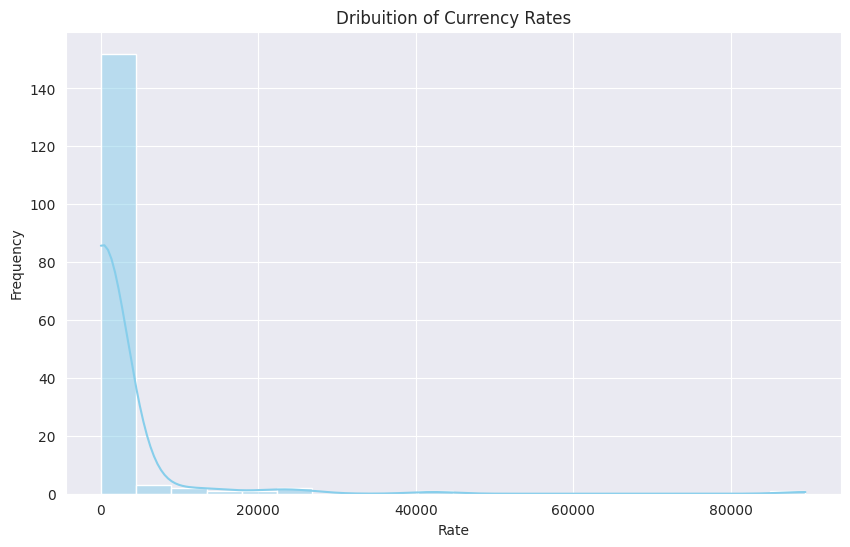

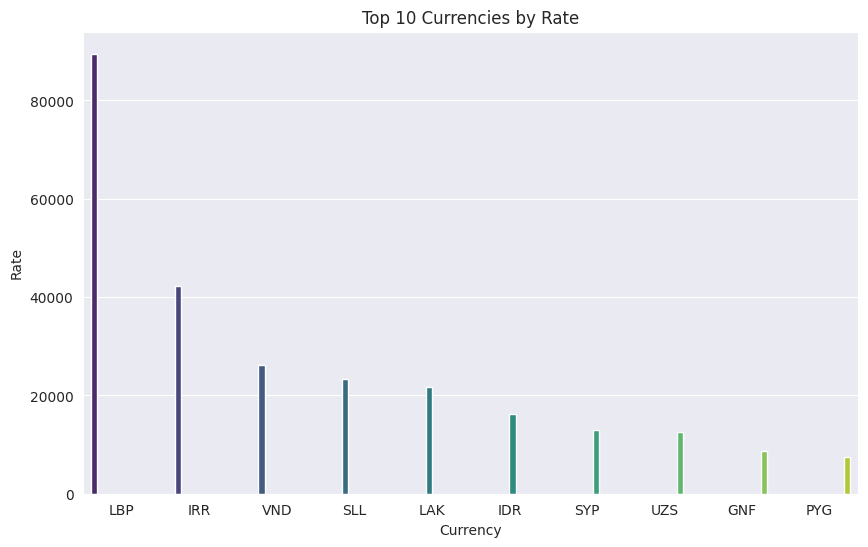

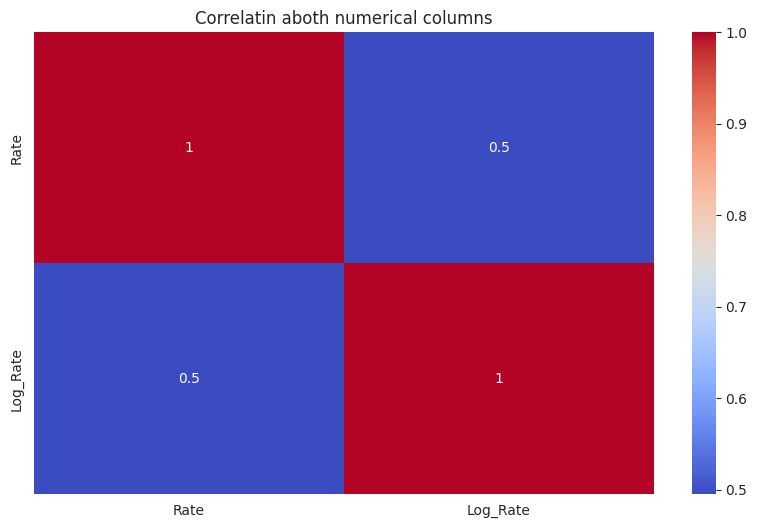

In [11]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

sns.set_style('darkgrid')
plt.rcParams["figure.figsize"] = (10, 6)

url = "https://api.exchangerate-api.com/v4/latest/USD"
response = requests.get(url)

if response.status_code == 200:
  data = response.json()
else:
  raise Exception("Error acess API")

df = pd.DataFrame(list(data['rates'].items()), columns=['Currency', 'Rate'])
df['Rate'] = df['Rate'].astype(float)

df['Log_Rate'] = np.log(df['Rate'])

df.to_csv('currency_exchenge')

print(df.head())
print("\nResumo estatístico:")
print(df.describe())

sns.histplot(df['Rate'], bins=20, kde=True, color='skyblue')
plt.title('Dribuition of Currency Rates')
plt.xlabel('Rate')
plt.ylabel('Frequency')
plt.show()

top10 = df.sort_values(by='Rate', ascending=False).head(10)
sns.barplot(x='Currency', y='Rate', data=top10, hue='Currency', dodge='False', palette='viridis')
plt.title('Top 10 Currencies by Rate')
plt.xlabel('Currency')
plt.ylabel('Rate')
plt.show()

df_num = df.select_dtypes(include=[np.number])

sns.heatmap(df_num.corr(), annot=True, cmap="coolwarm")
plt.title('Correlatin aboth numerical columns')
plt.show()